In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import a_funciones as fn

In [43]:
r = pd.read_csv("r2.csv", sep= ',')
cat = pd.read_csv("cat.csv", sep= ',')
num = pd.read_csv("num.csv", sep= ',')
y = pd.read_csv("y.csv", sep= ',')

In [44]:
cat.isnull().sum()
num.isnull().sum()
y.isnull().sum()



Unnamed: 0    0
Attrition     0
dtype: int64

In [45]:
r=r.drop(['Attrition'], axis=1)

In [46]:
import pandas_profiling

#pandas_profiling.ProfileReport(r)

* La distribución de 'retirementType' presenta un desequilibrio, con un 55.1% de los datos perteneciendo a una sola categoría."
* La distribución de 'resignationReason' presenta un desequilibrio, con un 59.3% de los datos perteneciendo a una sola categoría."

* La alta correlación entre Department y EducationField podría deberse a que ciertos campos educativos tienden a estar más representados en departamentos específicos. Por ejemplo, es posible que el departamento de Ingeniería tenga una mayor proporción de empleados con formación en campos relacionados con la ingeniería.

* La fuerte correlación entre PerformanceRating y PercentSalaryHike podría explicarse por el hecho de que los empleados con un aumento salarial más alto a menudo reciben una calificación de desempeño más alta. Esto podría indicar que los empleados que logran un mejor rendimiento son recompensados con aumentos salariales más significativos.


In [47]:
num=num.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [49]:
cat=cat.drop(['Unnamed: 0'],axis=1)

In [50]:
y=y.drop(['Unnamed: 0'],axis=1)

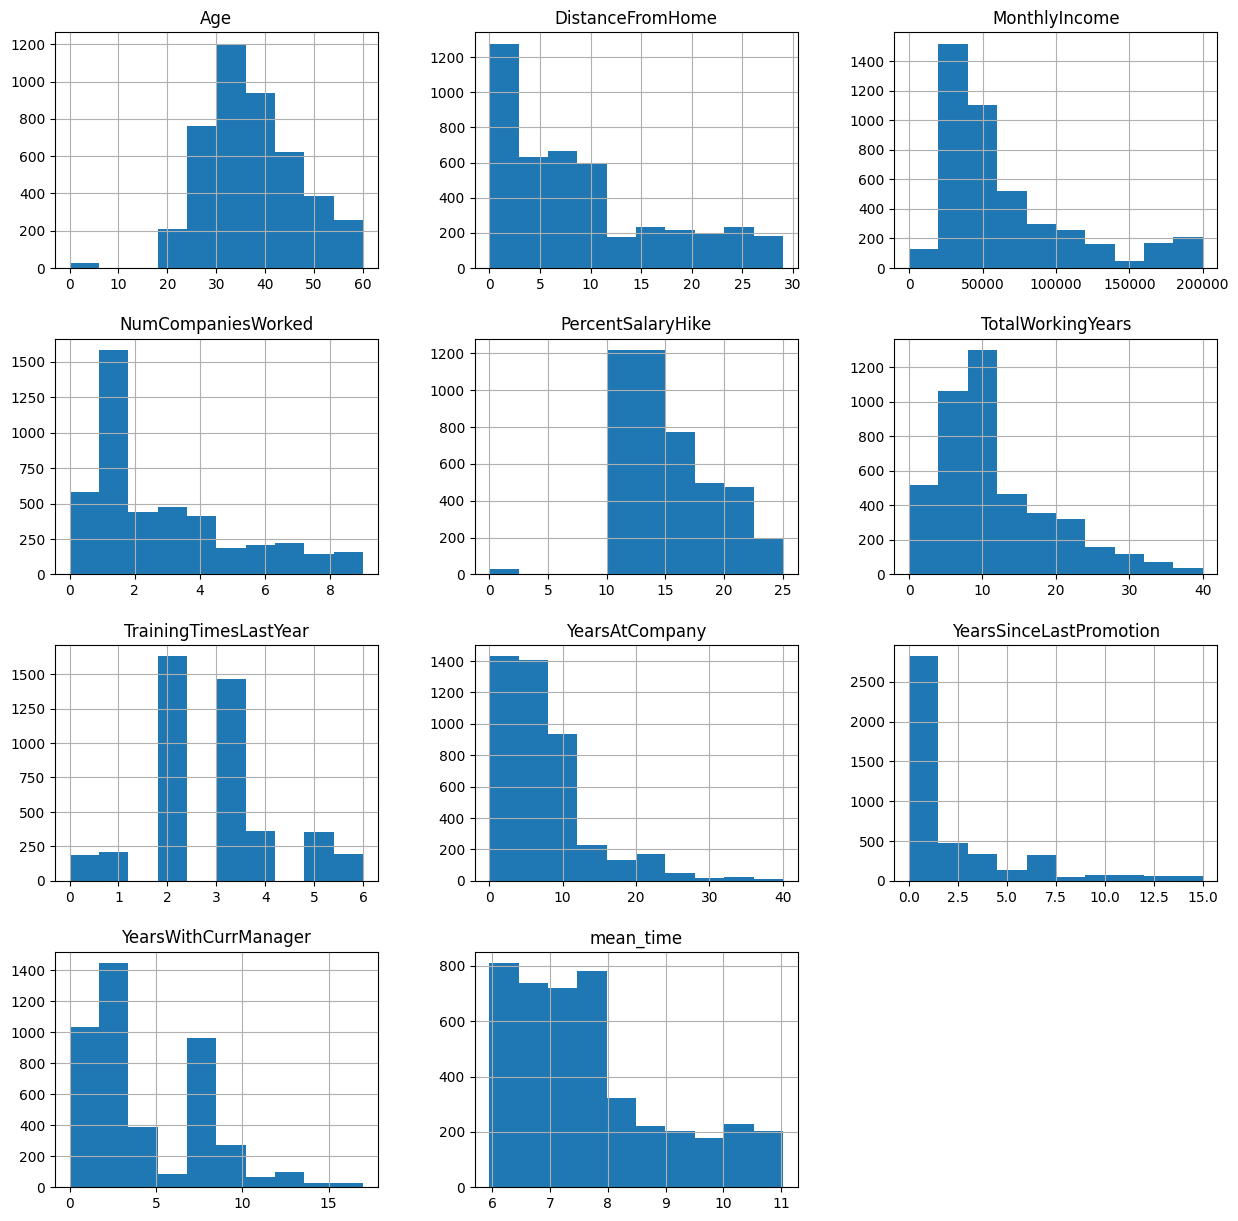

In [51]:
# Se realizan los histogramas para cada variable numérica
%matplotlib inline
num.hist(bins=10, figsize=(15, 15))
plt.show()

**Interpretación:** En general, casi todas las variables numéricas (10) tienen un sesgo hacia la derecha ya que la mayoría de datos se acumulan en este lado. Por otro lado, la variable Age, parece tener una distribución normal.

In [52]:
columnas = list(num.columns)

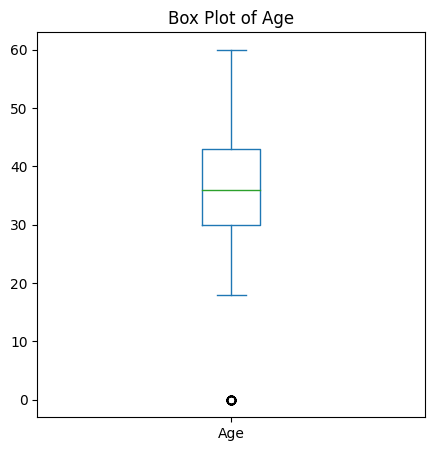

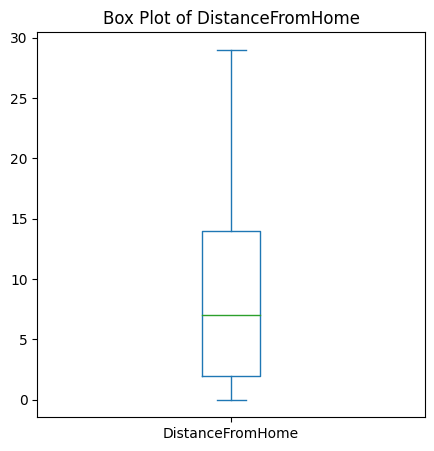

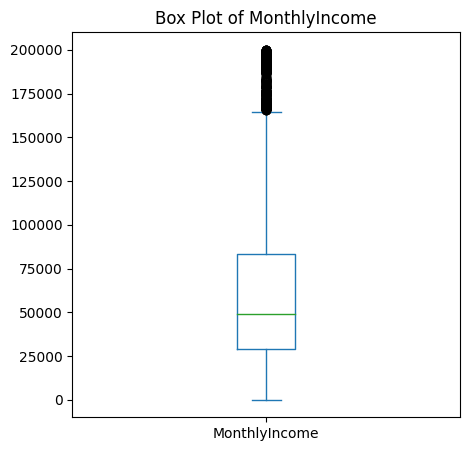

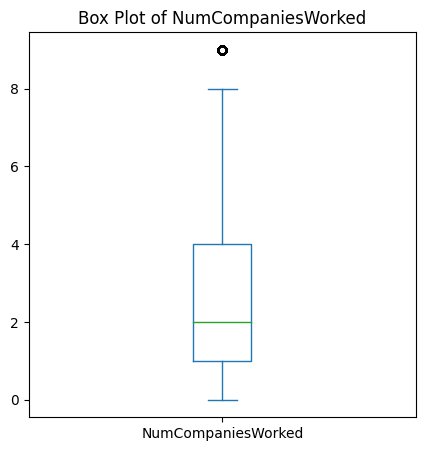

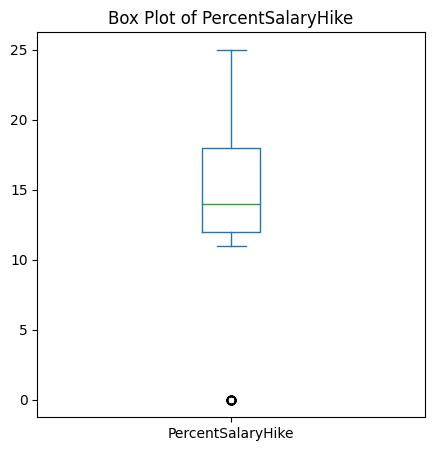

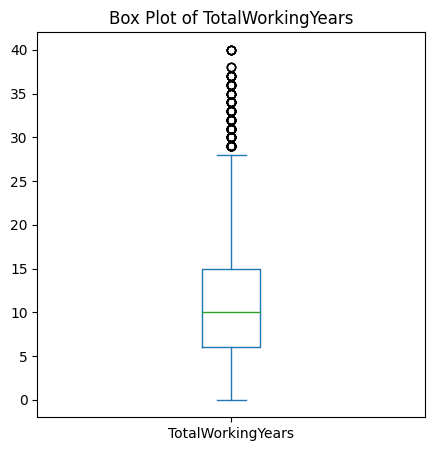

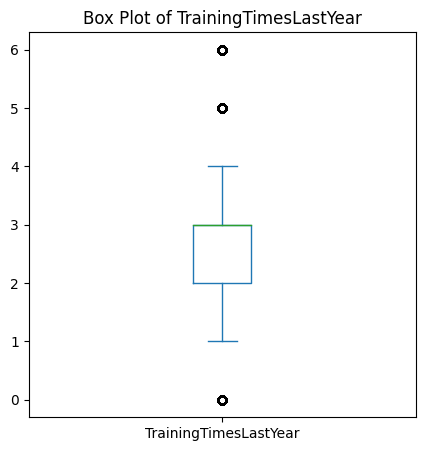

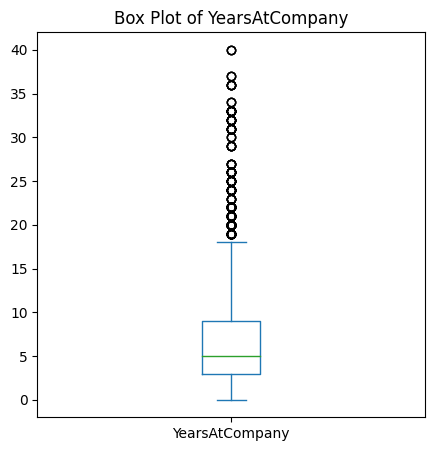

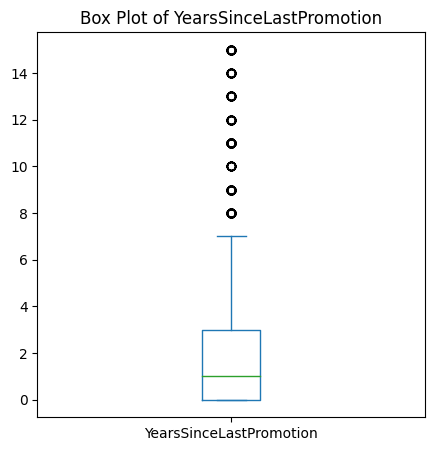

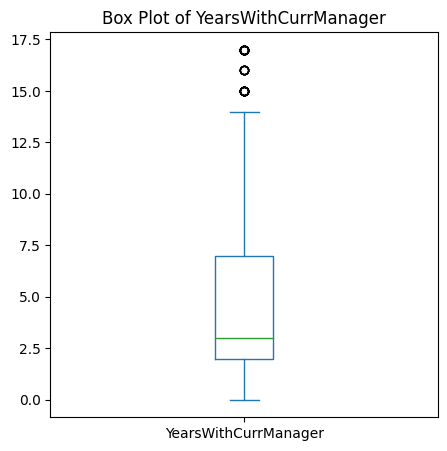

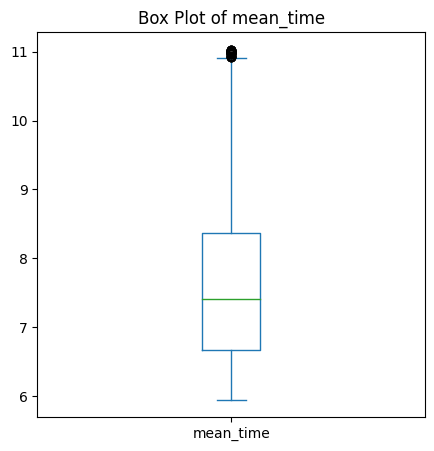

In [53]:
fn.plot_box_plots(num, columnas)

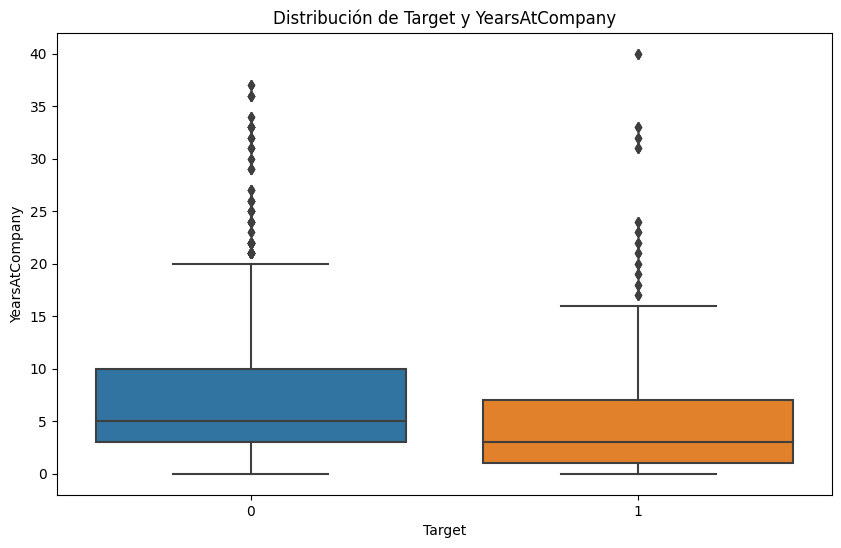

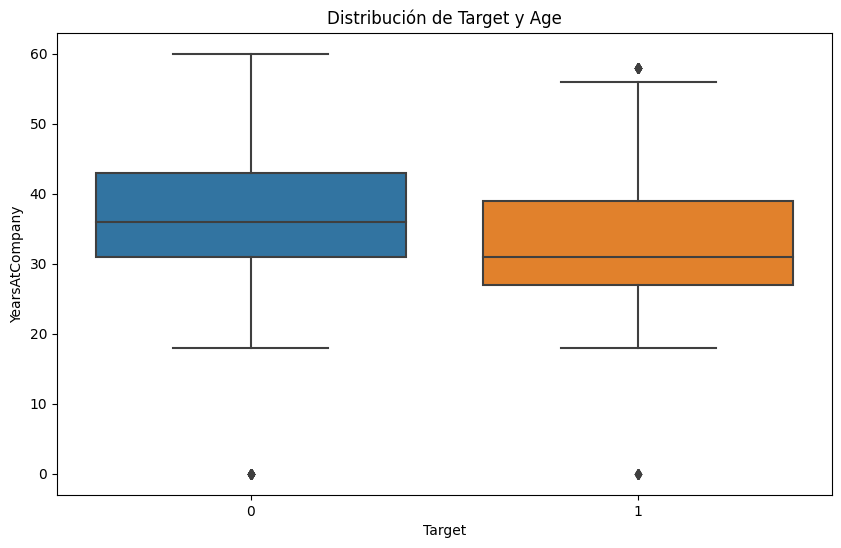

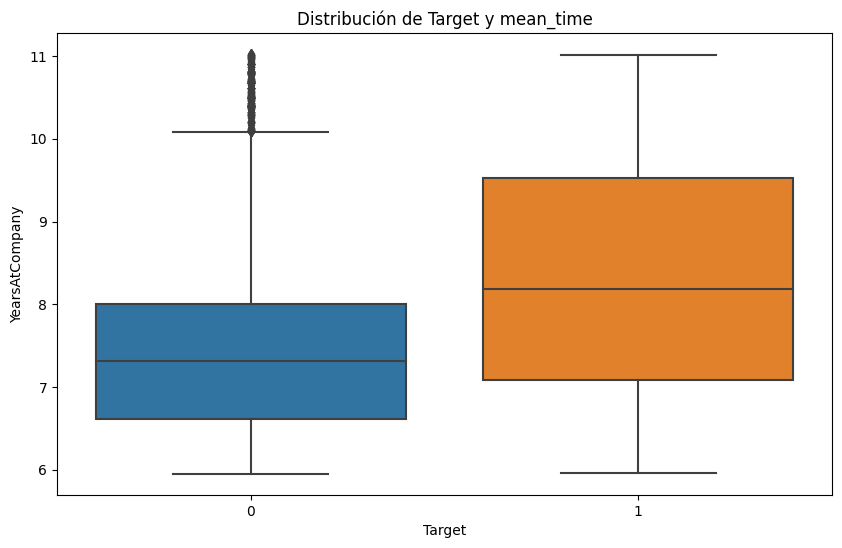

In [54]:
fn.bp(y['Attrition'], num['YearsAtCompany'], 'Target', 'YearsAtCompany', 'Distribución de Target y YearsAtCompany')
fn.bp(y['Attrition'], num['Age'], 'Target', 'YearsAtCompany', 'Distribución de Target y Age')
fn.bp(y['Attrition'], num['mean_time'], 'Target', 'YearsAtCompany', 'Distribución de Target y mean_time')

**Interpretación:** Según los dos graficos anteriores, las personas que llevan menos de 5 años en la compañia son más propensos a renunciar, mientras que los que llevan en promedio más de 5 años, no renuncian.
Por otro lado, los empleados que trabajan en promedio más de 7.8 horas tienen mayor tendencia a renunciar y los que trabajan 7 horas aproximadamente no renuncian. Con lo cual podemos concluir que si una persona lleva muchos años en la compañia y además trabaja más horas al día que el promedio, probablemente renuncie. En cuanto a la edad, se resalta que aunque la diferencia de edades no es mucha, las personas que tienden a renunciar están al rededor de los 30 años y los que no, tienen en promedio 35 años.

**Conclusiones análisis variables numericas:** A partir del resumen de las variables numericas de nuestro DataFrame se puede concluir que:

* Age: La distribución de la edad se aproxima a la normal y tiene un pequeño sesgo negativo.
* DistanceFromHome: Se puede observar que la mayoría de los trabajadores viven cerca de la empresa.
* Gender: Mas de la mitad de los trabajadores de la empresa son hombres.
* MonthlyIncome: El ingreso mensual tiene una distribución que parece normal y tiene un sesgo negativo lo que quiere decir que la mayor parte de los trabajadores ganan salarios básicos.
* NumCompaniesWorked: En el número de compañías que han trabajado los empleados de esta empresa se puede observar que la mayoría aproximadamente un 69% han trabajado en 3 empresas o menos.
* PercentSalaryHike: Se puede observar que aproximadamente un 55.7% de los empleados tienen un aumento de entre el 11% y 14%, el 23.9 tiene unos aumentos de entre el 15% y el 18% y solo el 9% tiene un aumento entre 19% y el 22%. Lo que podría general desigualdad general por lo tanto insatisfacción en algunos trabajadores.
* TotalWorkingYears: El total de años trabajados tiene una distribución que parece normal y tiene un sesgo negativo lo que quiere decir que la mayor parte de los trabajadores han trabajado pocos años en ella.
* YearsAtCompany: El total de años trabajados en la compañía en la mayoría de empleados es menor de 10 años.
* YearsSinceLastPromotion:  Años desde la última promoción, se puede observar que la mayoría de los trabajadores son promovidos antes de los 4 años.
* YearsWithCurrManager: Se puede observar que la mayoría de los empleados llevan menos de 8 años con el actual jefe, lo cual puede ser una ventaja o una desventaja ya que si el trabajador se encuentra satisfecho con su jefe pues se verá más comprometido y si no se encuentra satisfecho se puede ver afectado su rendimiento.
* mean_work: Se puede observar que el tiempo medio que trabajan es inferior a las 8 horas diarias en el último año.


In [55]:
# Se transforman las variables en str
cat=cat.astype(str)

In [56]:
#cat=cat.drop(['index'], axis=1)

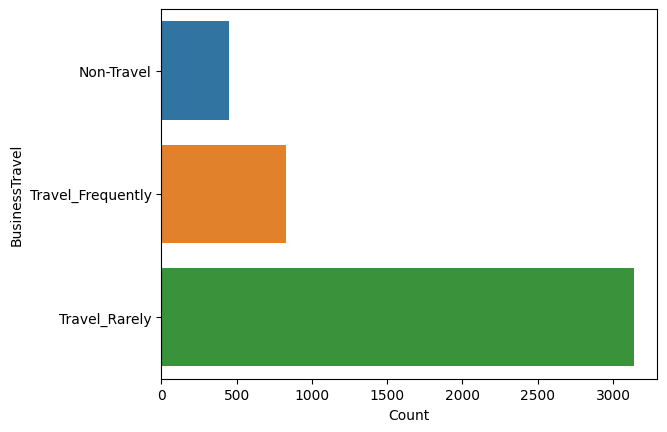

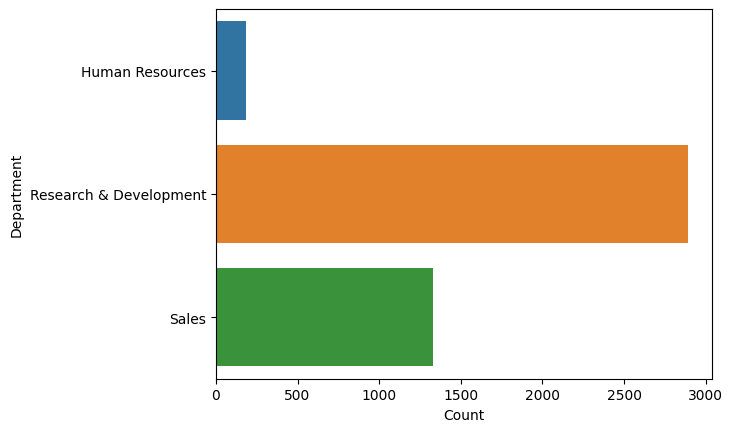

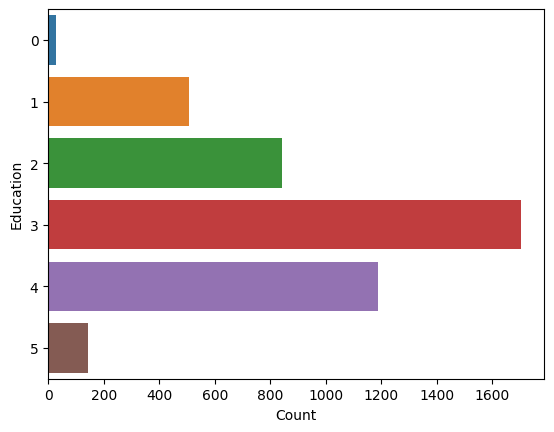

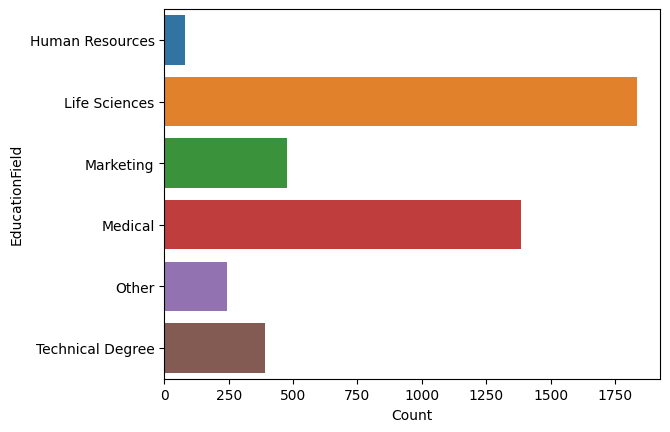

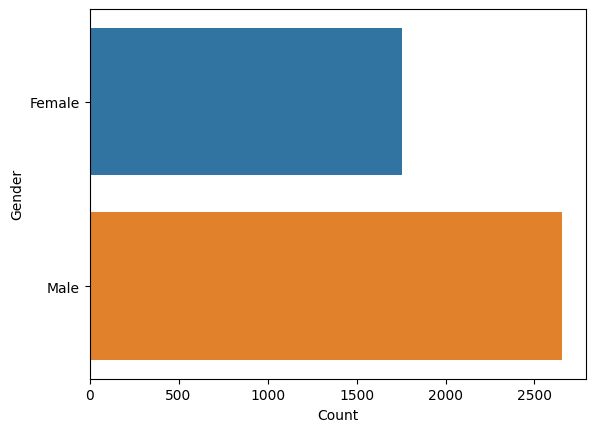

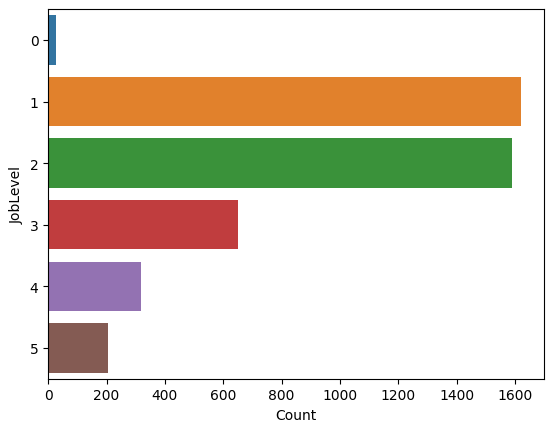

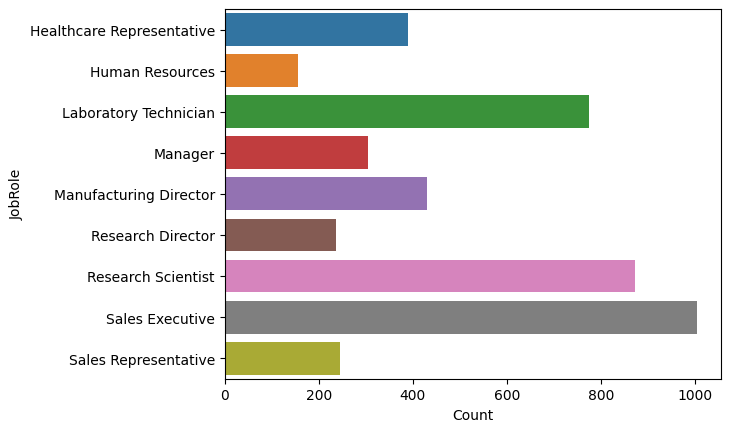

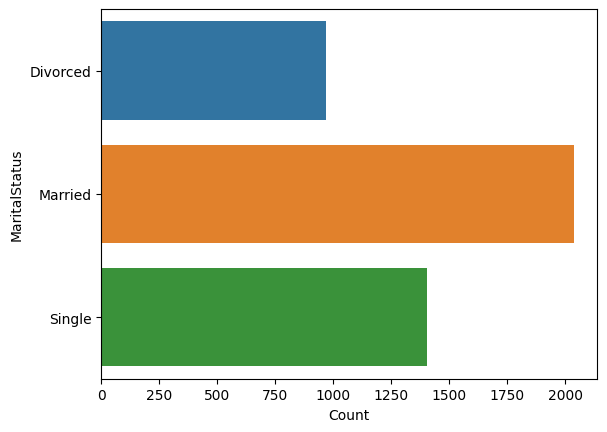

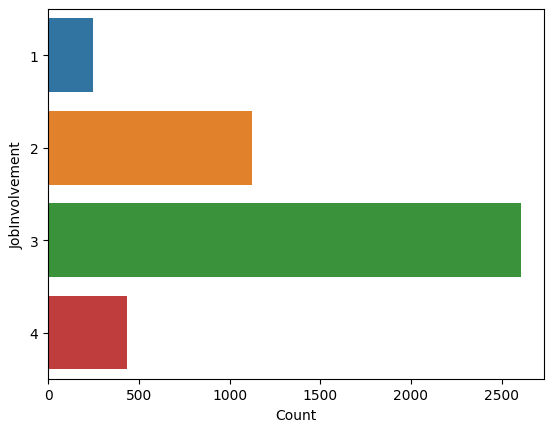

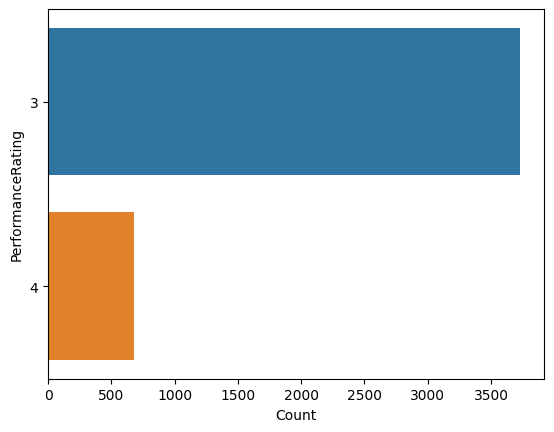

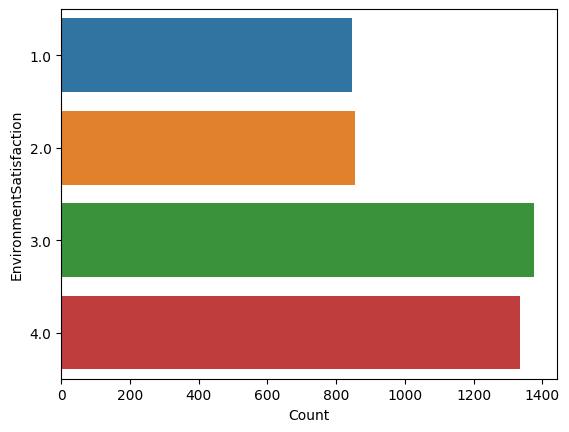

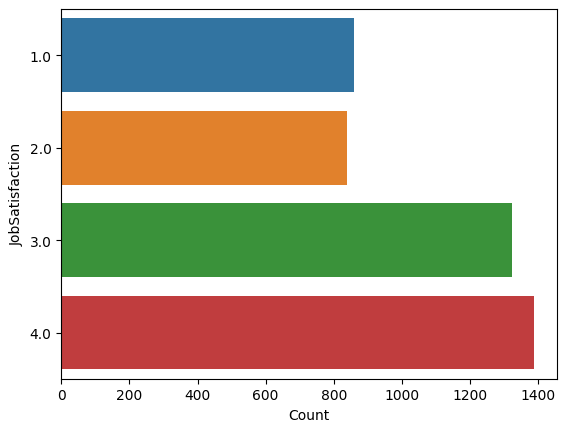

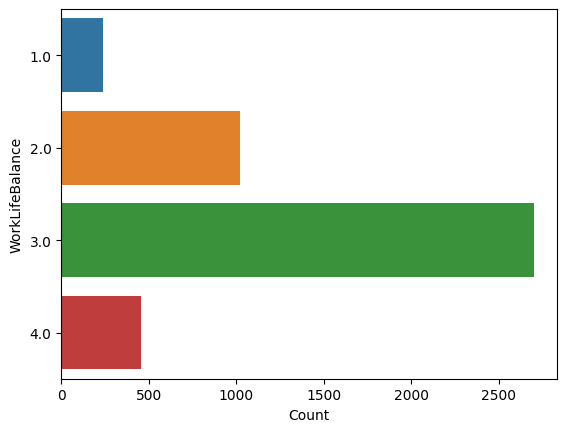

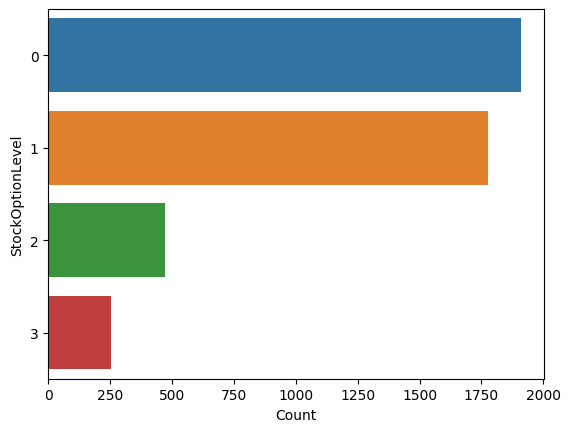

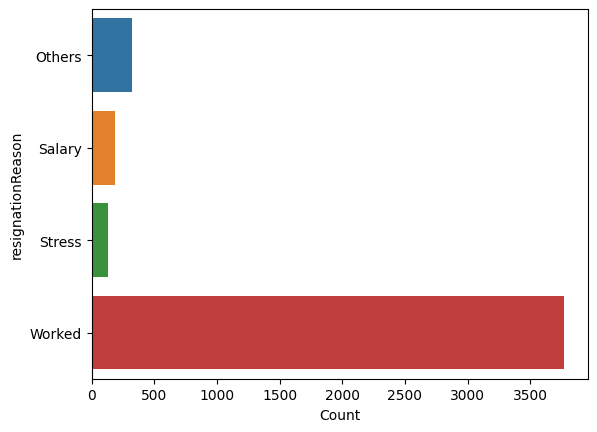

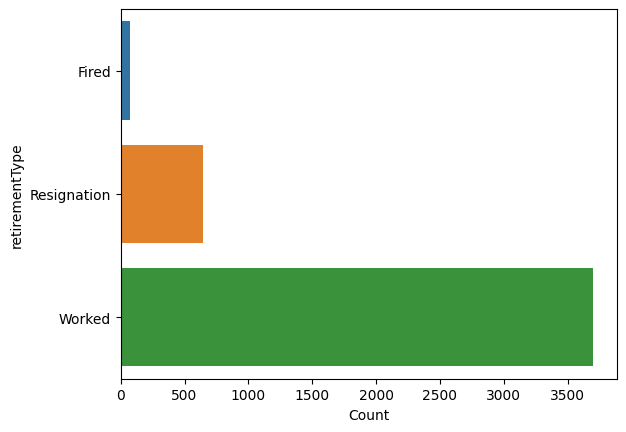

In [57]:
for column in cat.columns:
    fn.plot_category_counts(cat, column)

**Interpretación:** Se analizó la frecuencia de cada variable para observar su distribución, a continuación se analizan dos de estas variables respecto a la target.

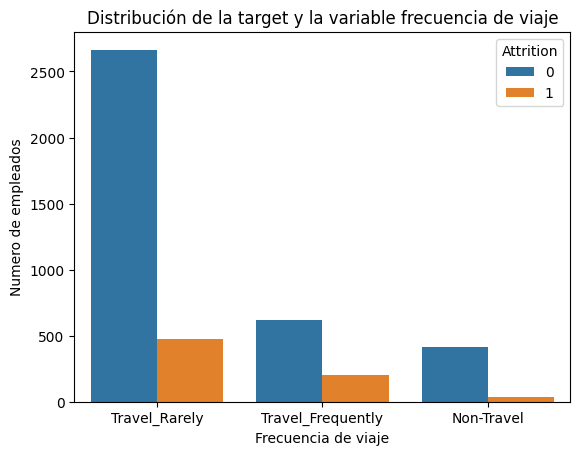

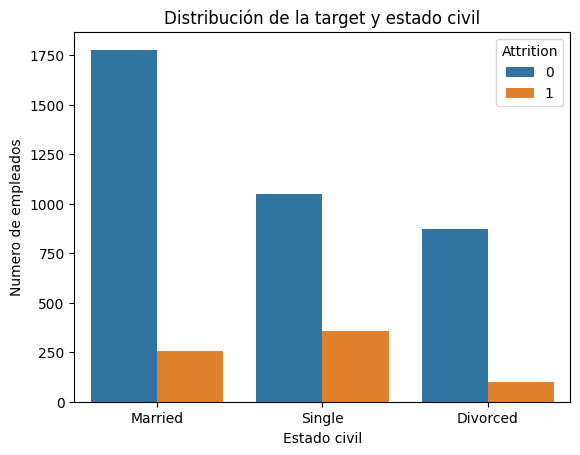

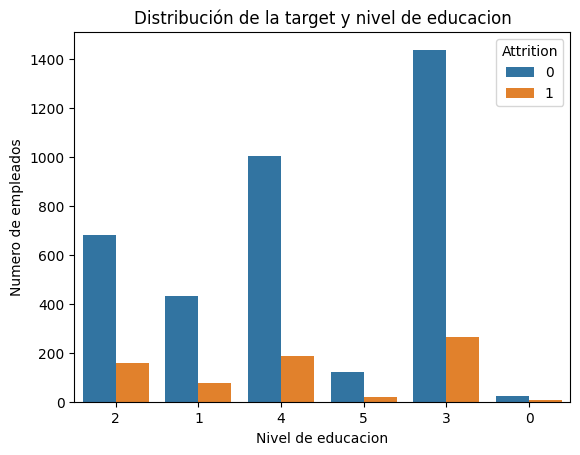

In [58]:
fn.plot_travel_frequency(cat['BusinessTravel'], y['Attrition'], 'Frecuencia de viaje', 'Numero de empleados', 'Distribución de la target y la variable frecuencia de viaje')
fn.plot_travel_frequency(cat['MaritalStatus'], y['Attrition'], 'Estado civil', 'Numero de empleados', 'Distribución de la target y estado civil')
fn.plot_travel_frequency(cat['Education'], y['Attrition'], 'Nivel de educacion', 'Numero de empleados', 'Distribución de la target y nivel de educacion')

Interpretación: Con los graficos anteriores identificamos que en cuanto a la frecuencia de viaje, en cada nivel tiene un comportamiento similar y se destaca que más empleados no renuncian cuando viajan raramente, pero proporcionalmente, renuncian más empleados cuando viajan frecuentemente en comparación de los que no viajan y los que viajan raramente. Adicionalmente, en el estado civil las personas que son solteras son más propensas a renunciar, mientras que los casados y divorciados no. Mientras que en el análisis de la eduación, la mayor parte de los empleados son licenciados, master y universitarios, destacando que los universitarios son los que representan la mayor parte de las renuncias ya que al ser tan jóvenes posiblemente se les presenten mejores oportunidades laborales.

**Conclusiones análisis variables categóricas:**
* Attrition:  La variable objetivo tiene mas registros de trabajadores que no renunciaron.
* BusinessTravel: Los trabajadores en esta empresa en su mayoría viajan raramente o no viajan, en comparación con los que viajan frecuentemente.
* Department: Esta empresa tiene la mayor parte de su equipo dedicado a la investigación y desarrollo, también tiene una cantidad considerable de trabajadores en ventas, y en recursos humanos hay muy pocos trabajadores, lo que puede dificultar un poco la retención de trabajadores. Es posible que la empresa necesite dedicar más recursos al departamento.
* Education: En el nivel educativo se puede ver que el 39% es licenciado, el 27% tiene Master, el 19% son universitarios, el 11% tiene estudios por debajo de universidad y el 4% son doctores. Mas adelante se analizará cómo se comporta el nivel de educación con respecto a la variable objetivo (si renuncio o no).
* EducationField: Las ciencias de la vida y la medicina no tienen que ver directamente con el marketing y mas de la mitad de los trabajadores que trabajan allí, lo que podría sugerir que la empresa podría estar involucrada en investigaciones, desarrollo y promoción de productos o servicios médicos.
* JobLevel: La información proporcionada sugiere que más de la mitad de los empleados de la empresa trabajan en puestos de nivel bajo. Es importante tener en cuenta que estos trabajadores pueden sentir la necesidad de progresar en sus carreras y tener mayores oportunidades de desarrollo profesional. Si la empresa no ofrece estas oportunidades, es probable que estos empleados se sientan desmotivados y sean más propensos a renunciar. Para retener el talento en estos puestos, la empresa podría considerar ofrecer programas de desarrollo y crecimiento profesional, así como oportunidades de promoción interna. Esto puede mejorar el ambiente laboral y el compromiso de los empleados con la empresa, lo que a su vez puede reducir la tasa de rotación.
* JobRole: En la empresa, los puestos más comunes son los de ejecutivos de ventas con un 22%, seguido por los científicos de laboratorio con un 20% y los técnicos de laboratorio con un 18%, lo que suma un total del 60% de la compañía. En contraste, los directores de manufacturas, representantes de atención médica, gerentes, representantes de ventas, directores de investigación y recursos humanos, representan solo el 40% restante de la empresa.
* MaritalStatus: El 46% de los trabajadores están casados, el 32% se encuentra soltero y el 22% divorciado, anteriormente analizamos esta variable para darnos cuenta si tiene alguna relación con la renuncia o no de un trabajador, obteniendo que las personas solteras tienden a renunciar más.
* JobInvolvement: La mayoría de los trabajadores tienen un nivel de participación bajo o nulo sobre las acciones de la compañía, esto puede ser una desventaja ya que las empresas en los que los trabajadores pueden tener un nivel alto, los empleados se sientes más comprometidos.
* TrainingTimesLastYear: La frecuencia de formación impartida a los empleados durante el año pasado en su mayor parte fue de 2 a 4 veces.
* JobInvolvement: Se puede observar que la mayoría de trabajadores tienen un nivel de implicación en el trabajo alto 59% o medio 25.5%, un 9.8% tiene un nivel superior y  apenas un 5.6% tiene un nivel bajo.
* PerformanceRating: Todos los trabajadores tienen una valoración del rendimiento en el ultimo año, excelente y sobresaliente.
* JobSatisfaction: La mayoría un 61.4% de los trabajadores tienen un nivel de satisfacción con el ambiente laboral alto o muy alto, un 19.4% tienen un nivel de satisfacción medio, y un 19.2% tienen un nivel de satisfacción bajo.
* WorkLifeBalance: Se puede observar que la mayoría de trabajadores tienen un balance entre su vida y el trabajo el 61.2% tienen un nivel de conciliación muy buena con un 61.2%, mientras que el 23.1% tienen un nivel de conciliación bueno, un 10.3% tiene un nivel de conciliación muy bueno y un 5.4% tiene un nivel de conciliación malo.
* Es posible que la empresa necesite dedicar más recursos al departamento de recursos humanos para que puedan centrarse en la retención de empleados. Además, sería importante que la empresa analice cómo pueden mejorar la cultura de la empresa y las oportunidades de desarrollo para sus empleados. Al hacerlo, podrían aumentar la satisfacción de los empleados y reducir la rotación.